# Speed Dating Experiment

### What attributes influence the selectoin of a romantic partner?

Predict the variable dec_o (decision by partner)

In [105]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [106]:
df = pd.read_csv("Speed Dating Data.csv")

In [107]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Introduction

Y variable
- Decision of partner night of event (dec_o) = what we want to predict 

X variables
- Age of partner (age_o)
- Age of participent (age)
- Race of partner (race_o)
- Race of participent (race)
- Stated preference of partner, before the date (pf_o_att)
- Rating by partner the night of the event (attr_o)
- Correlation between partners ratings of interests (int_corr)


I had difficulties selecting the best type of variables for the prediction. I tried different combinations in the correlation table, but couldn't see good correlations.

I am using these (x) variables because I thinks this will influence a persons atraction to one another.
It could be interesting to see if peoples choices depend on the race, age, correlation between ratings of interest and stated preference of the partner (before the date). 



In [108]:
df = df[['dec_o','age','age_o','race','race_o', 'pf_o_att', 'attr_o', 'int_corr']]

In [109]:
corr = df.corr()
corr

,dec_o,age,age_o,race,race_o,pf_o_att,attr_o,int_corr
dec_o,1.000000,-0.047854,0.015128,-0.068386,0.054205,-0.020910,0.486885,0.019005
age,-0.047854,1.000000,0.100673,-0.058010,0.007802,-0.073981,-0.051309,0.091108
age_o,0.015128,0.100673,1.000000,0.007802,-0.057251,0.030857,0.039870,0.089677
race,-0.068386,-0.058010,0.007802,1.000000,0.034654,0.019379,-0.102837,-0.032557
race_o,0.054205,0.007802,-0.057251,0.034654,1.000000,-0.054690,-0.010536,-0.031696
pf_o_att,-0.020910,-0.073981,0.030857,0.019379,-0.054690,1.000000,0.022952,-0.085595
attr_o,0.486885,-0.051309,0.039870,-0.102837,-0.010536,0.022952,1.000000,0.016360
int_corr,0.019005,0.091108,0.089677,-0.032557,-0.031696,-0.085595,0.016360,1.000000


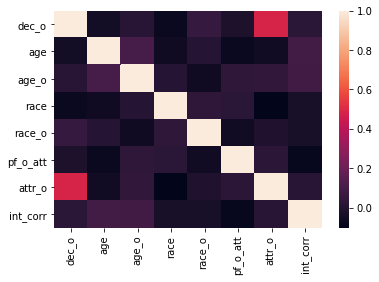

In [110]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

It doesn't really show that much correlation between the variables. Only the "rating by partner the night of the event "(attr_o) shows a little correlation. 

## Data Cleaning

I am trying to find out if there are any "strange" values in the dataset by cheking the data types and dropping NaN's (if they are in there). 

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dec_o     8378 non-null   int64  
 1   age       8283 non-null   float64
 2   age_o     8274 non-null   float64
 3   race      8315 non-null   float64
 4   race_o    8305 non-null   float64
 5   pf_o_att  8289 non-null   float64
 6   attr_o    8166 non-null   float64
 7   int_corr  8220 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 523.8 KB


In [136]:
df['dec_o'].value_counts()

0    4553
1    3417
Name: dec_o, dtype: int64

In [113]:
df = df.dropna()
df.head()

,dec_o,age,age_o,race,race_o,pf_o_att,attr_o,int_corr
0,0,21.0,27.0,4.0,2.0,35.0,6.0,0.14
1,0,21.0,22.0,4.0,2.0,60.0,7.0,0.54
2,1,21.0,22.0,4.0,4.0,19.0,10.0,0.16
3,1,21.0,23.0,4.0,2.0,30.0,7.0,0.61
4,1,21.0,24.0,4.0,3.0,30.0,8.0,0.21


## Exploratory Data Analysis

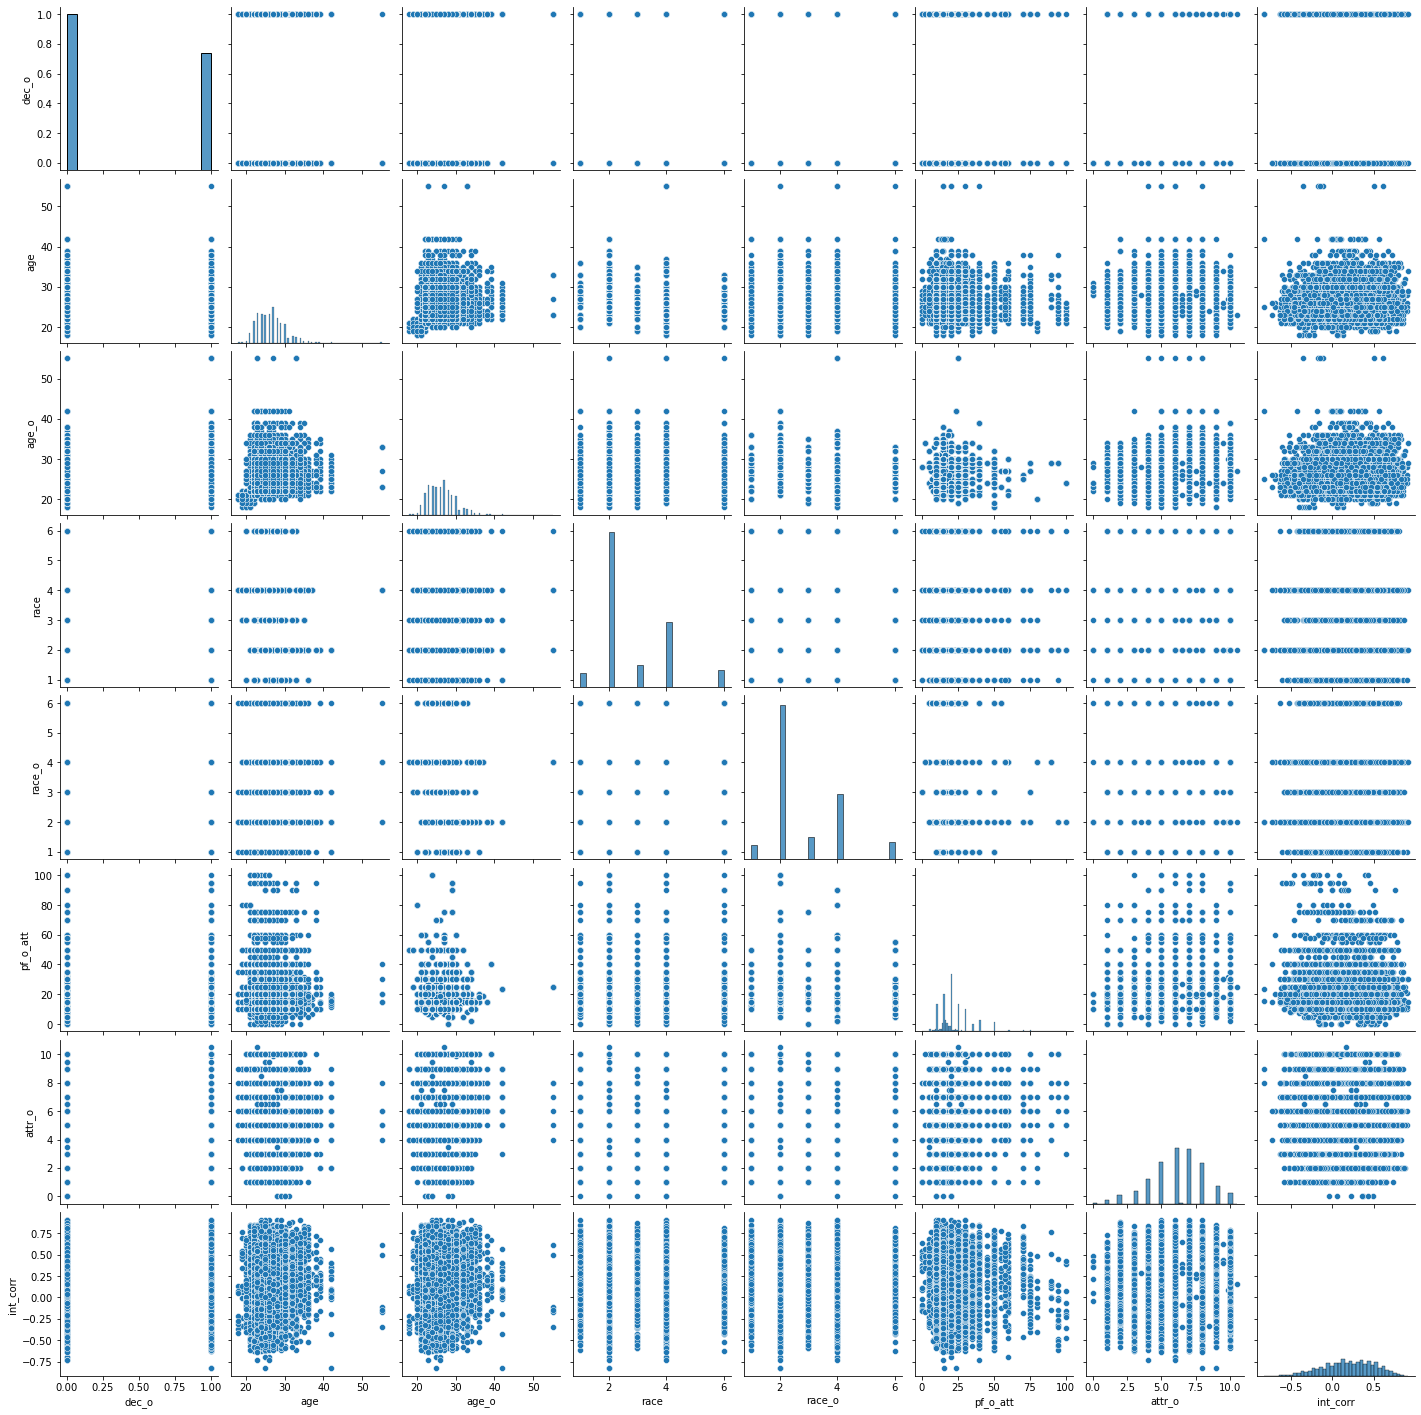

In [114]:
sns.pairplot(df)
plt.show()

The relation between the variables doesn't seem linear.  The variables also doesn't seem correlect with each other. 

## Predicitve Model - K-nearest Neighbor

The K-nearest Neigbor algortihm works as following:

The alogrithm uses the training dataset and predicts values based on their neighbor values. 
We can select the number of neighbors to ifluence the prediciton of the model. The algorithm learns from the neigbors data and uses this data to make a predictive model. 


In [119]:
from sklearn.model_selection import train_test_split

X = df[['age','age_o','race','race_o', 'pf_o_att', 'attr_o', 'int_corr']]
y = df['dec_o']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [130]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=7) #create a KNN-classifier with 7 neighbors 
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.7114178168130489

71% of the partners decision prediction is correct

Accuracy = 71%

In [132]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[990, 322],
       [368, 711]])

In [133]:
knn.classes_ # to learn which columns are which (0 = No, 1 = Yes)

array([0, 1])

In [138]:
conf_matrix = pd.DataFrame(cm, index=['(Actual) Decision: No', '(Actual) Decision: Yes'], columns = ['(Predicted) Decision: No', '(Predicited) Decision: Yes']) 
conf_matrix

,(Predicted) Decision: No,(Predicited) Decision: Yes
(Actual) Decision: No,990,322
(Actual) Decision: Yes,368,711


## Evaluation

$precision = \frac{990}{990 + 368} = .73$

$recall = \frac{990}{990 + 322} = .75$

- Accuracy = 71%
- Precision = .73
- Recal = .75

## Conclusion

From this model, we can conclude that 73% (precision) of the predicted cases is correctly predicted. We can note that the model is 71% (accuracy) accurate on the prediction. We can also see from the calculations that 75% of the "yes" decisions are correctly predicted as a "yes" decision. 

I am still struggling with the understanding of the mathematical logic behind formulas and graphs. I have a hard time reading and interpreting the graphs and outcomes. I still need to look up examples and the lecture sheets to make sense of the output from the data processing. 
